In [0]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [0]:
from google.colab import drive
drive.mount(('/content/drive'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/vehicle.csv')

In [0]:
df.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [0]:
df.shape

(846, 19)

In [0]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [0]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


<strong>Intial inference:</strong> <br>
There are 3 classes [car, bus, van]. The number of cars is more because they represent 2 differnt models of car which are harder to distinguish. However since the numner of cars is double than that of bus and van, the model will be able to better distinguish a car than a bus or a van.<br><br>

There are a few missing values in the given dataset and instead of filling them with mean, it would be better to take into consideration which class they belong to and fill the values approprietly. Outliers will be treated in a similar manner.

Splitting dataframe into 3 based on class

In [0]:
df_cars = df[df['class']=='car']
df_van = df[df['class']=='van']
df_bus = df[df['class']=='bus']

Filling missing values and checking for outliers for car

# Missing values and outlier treatment for cars

In [0]:
df_cars.isnull().sum()

compactness                    0
circularity                    1
distance_circularity           0
radius_ratio                   3
pr.axis_aspect_ratio           1
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         1
max.length_rectangularity      0
scaled_variance                2
scaled_variance.1              2
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    3
skewness_about                 2
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
MICE_imputer = IterativeImputer()
X = df_cars.drop('class', axis = 1)
X.iloc[:,:] = MICE_imputer.fit_transform(X) 

In [0]:
df_cars.iloc[:,:-1] = X

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df_cars.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

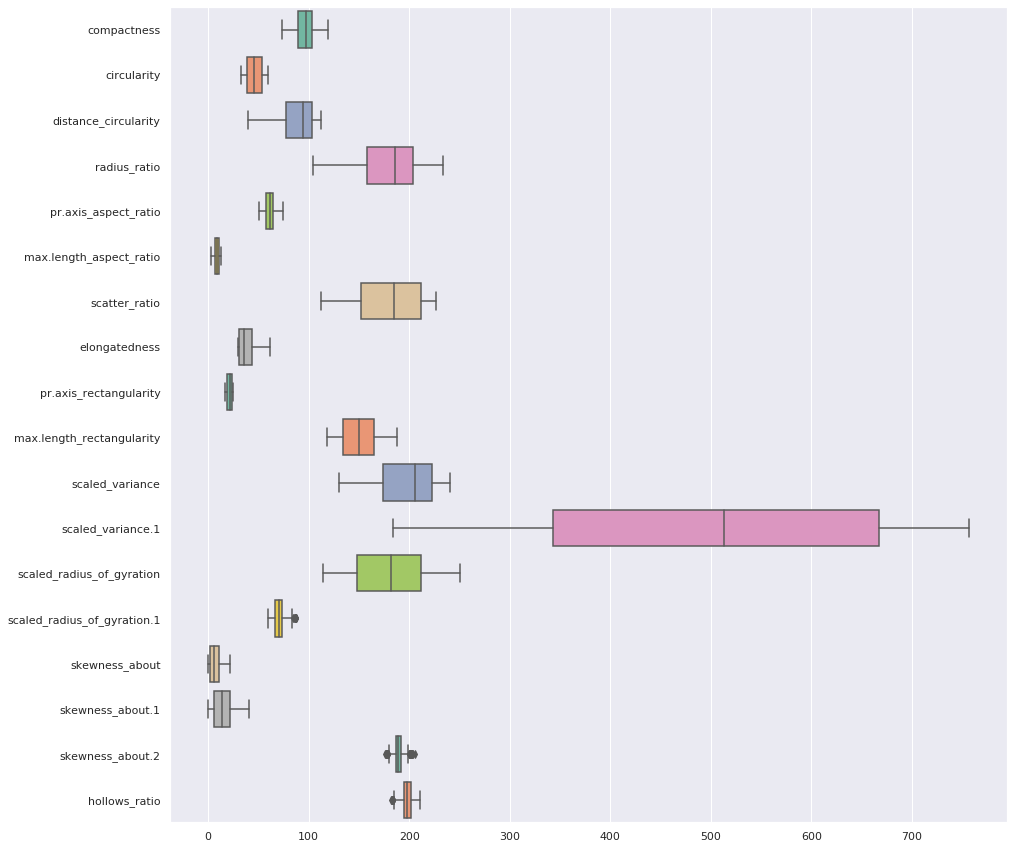

In [0]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_cars, orient="h", palette="Set2")

only scaled_radius_of_gyration.1, skewness_about.2 and hollows_ratio have outliers

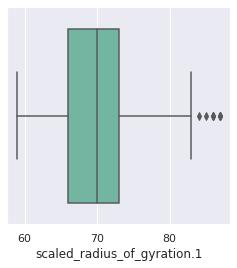

In [0]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.boxplot(x=df_cars['scaled_radius_of_gyration.1'], orient="h", palette="Set2")

Checking the outliers for scaled_radius_of_gyration.1

In [0]:
df_cars[df_cars['scaled_radius_of_gyration.1']>83]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
160,82.0,38.0,53.0,125.0,59.0,5.0,133.0,51.0,18.0,128.0,152.0,259.0,146.0,87.0,0.0,0.0,177.0,183.0,car
231,85.0,33.0,40.0,115.0,57.0,3.0,112.0,61.0,17.0,119.0,130.0,184.0,127.0,86.0,12.0,21.0,181.0,183.0,car
342,83.0,37.0,54.0,131.0,61.0,4.0,135.0,50.0,18.0,127.0,152.0,271.0,141.0,85.0,3.0,6.0,180.0,183.0,car
351,88.0,38.0,58.0,137.0,60.0,5.0,148.0,46.0,19.0,131.0,163.0,319.0,157.0,86.0,12.0,0.0,180.0,183.0,car
411,78.0,36.0,51.0,116.0,56.0,4.0,120.0,57.0,17.0,124.0,135.0,209.0,135.0,84.0,1.0,12.0,177.0,184.0,car
463,85.0,40.0,66.0,121.0,52.0,4.0,152.0,44.0,19.0,133.0,170.0,340.0,163.0,87.0,13.0,3.0,180.0,183.0,car
515,76.0,38.0,58.0,125.0,58.0,5.0,133.0,51.0,18.0,127.0,152.0,259.0,145.0,87.0,0.0,21.0,177.0,184.0,car
612,80.0,34.0,42.0,110.0,57.0,3.0,114.0,59.0,17.0,119.0,131.0,191.0,121.0,87.0,4.0,7.0,179.0,183.0,car
834,82.0,36.0,51.0,114.0,53.0,4.0,135.0,50.0,18.0,126.0,150.0,268.0,144.0,86.0,15.0,4.0,181.0,182.0,car


Presented data does not seem to be an anamoly and looks to be valid

Checking the outliers for skewness_about.2


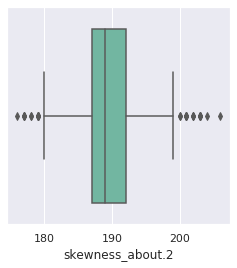

In [0]:
ax = sns.boxplot(x=df_cars['skewness_about.2'], orient="h", palette="Set2")

In [0]:
df_cars[df_cars['skewness_about.2']<180]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
26,83.0,36.0,54.0,119.0,57.0,6.0,128.0,53.0,18.0,125.0,143.0,238.0,139.0,82.0,6.0,3.0,179.0,183.0,car
73,73.0,37.0,53.0,111.0,54.0,6.0,126.0,55.0,18.0,128.0,135.0,227.0,147.0,82.0,1.0,15.0,176.0,184.0,car
89,80.0,37.0,57.0,116.0,55.0,6.0,125.0,54.0,18.0,125.0,142.0,229.0,132.0,81.0,8.0,5.0,178.0,184.0,car
160,82.0,38.0,53.0,125.0,59.0,5.0,133.0,51.0,18.0,128.0,152.0,259.0,146.0,87.0,0.0,0.0,177.0,183.0,car
181,78.0,36.0,60.0,116.0,56.0,6.0,123.0,55.0,17.0,124.0,141.0,221.0,121.0,78.0,3.0,16.0,178.0,185.0,car
367,82.0,37.0,59.0,134.0,63.0,7.0,135.0,51.0,18.0,128.0,151.0,264.0,143.0,82.0,11.0,24.0,179.0,185.0,car
380,80.0,39.0,60.0,122.0,56.0,6.0,139.0,49.0,18.0,131.0,151.0,281.0,142.0,80.0,0.0,5.0,179.0,186.0,car
406,80.0,38.0,64.0,130.0,59.0,8.0,134.0,51.0,18.0,126.0,152.0,259.0,135.0,76.0,1.0,23.0,179.0,188.0,car
411,78.0,36.0,51.0,116.0,56.0,4.0,120.0,57.0,17.0,124.0,135.0,209.0,135.0,84.0,1.0,12.0,177.0,184.0,car
515,76.0,38.0,58.0,125.0,58.0,5.0,133.0,51.0,18.0,127.0,152.0,259.0,145.0,87.0,0.0,21.0,177.0,184.0,car


In [0]:
df_cars[df_cars['skewness_about.2']>198]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
49,91.0,45.0,79.0,176.0,59.0,9.0,163.0,40.0,20.0,148.0,184.0,404.0,179.0,62.0,0.0,10.0,199.000000,208.0,car
140,90.0,37.0,80.0,171.0,58.0,9.0,157.0,42.0,20.0,132.0,172.0,373.0,115.0,60.0,3.0,18.0,201.000000,209.0,car
144,95.0,45.0,80.0,186.0,62.0,7.0,164.0,40.0,20.0,145.0,188.0,406.0,178.0,65.0,11.0,18.0,199.000000,204.0,car
148,90.0,43.0,72.0,172.0,59.0,8.0,154.0,42.0,19.0,144.0,174.0,360.0,158.0,61.0,15.0,9.0,203.000000,209.0,car
152,93.0,35.0,72.0,172.0,62.0,7.0,149.0,44.0,19.0,124.0,169.0,334.0,125.0,62.0,5.0,30.0,203.000000,210.0,car
166,92.0,36.0,78.0,165.0,57.0,8.0,153.0,43.0,19.0,128.0,169.0,349.0,124.0,60.0,4.0,19.0,203.000000,211.0,car
190,97.0,48.0,94.0,198.0,63.0,9.0,181.0,36.0,21.0,155.0,200.0,494.0,189.0,64.0,20.0,11.0,199.000000,203.0,car
210,94.0,39.0,89.0,194.0,62.0,9.0,172.0,38.0,21.0,135.0,191.0,444.0,121.0,63.0,4.0,23.0,201.000000,209.0,car
326,106.0,49.0,96.0,201.0,61.0,10.0,181.0,36.0,21.0,158.0,197.0,494.0,180.0,62.0,19.0,15.0,202.000000,209.0,car
347,88.0,44.0,77.0,167.0,59.0,6.0,151.0,44.0,19.0,145.0,175.0,343.0,177.0,64.0,9.0,12.0,202.000000,208.0,car


Presented data does not seem to be an anamoly and looks to be valid


Checking the outliers for hollows_ratio

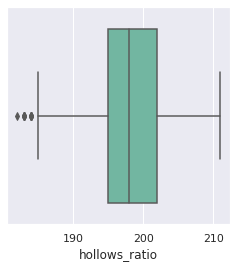

In [0]:
ax = sns.boxplot(x=df_cars['hollows_ratio'], orient="h", palette="Set2")

In [0]:
df_cars[df_cars['hollows_ratio']<185]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
26,83.0,36.0,54.0,119.0,57.0,6.0,128.0,53.0,18.0,125.0,143.0,238.0,139.0,82.0,6.0,3.0,179.0,183.0,car
73,73.0,37.0,53.0,111.0,54.0,6.0,126.0,55.0,18.0,128.0,135.0,227.0,147.0,82.0,1.0,15.0,176.0,184.0,car
89,80.0,37.0,57.0,116.0,55.0,6.0,125.0,54.0,18.0,125.0,142.0,229.0,132.0,81.0,8.0,5.0,178.0,184.0,car
160,82.0,38.0,53.0,125.0,59.0,5.0,133.0,51.0,18.0,128.0,152.0,259.0,146.0,87.0,0.0,0.0,177.0,183.0,car
231,85.0,33.0,40.0,115.0,57.0,3.0,112.0,61.0,17.0,119.0,130.0,184.0,127.0,86.0,12.0,21.0,181.0,183.0,car
260,83.0,37.0,54.0,118.0,55.0,4.0,129.0,52.0,18.0,127.0,146.0,245.0,140.0,81.0,4.0,13.0,180.0,184.0,car
289,88.0,37.0,57.0,132.0,62.0,6.0,135.0,50.0,18.0,125.0,151.0,265.0,144.0,83.0,16.0,16.0,180.0,184.0,car
342,83.0,37.0,54.0,131.0,61.0,4.0,135.0,50.0,18.0,127.0,152.0,271.0,141.0,85.0,3.0,6.0,180.0,183.0,car
351,88.0,38.0,58.0,137.0,60.0,5.0,148.0,46.0,19.0,131.0,163.0,319.0,157.0,86.0,12.0,0.0,180.0,183.0,car
378,82.0,36.0,54.0,117.0,53.0,7.0,125.0,54.0,18.0,126.0,146.0,229.0,128.0,78.0,1.0,5.0,180.0,184.0,car


Presented data does not seem to be an anamoly and looks to be valid

# Missing value and outlier treatment for van

In [0]:
df_van.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           1
radius_ratio                   1
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         1
max.length_rectangularity      0
scaled_variance                1
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
MICE_imputer = IterativeImputer()
X = df_van.drop('class', axis = 1)
X.iloc[:,:] = MICE_imputer.fit_transform(X) 

In [0]:
df_van.iloc[:,:-1] = X

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


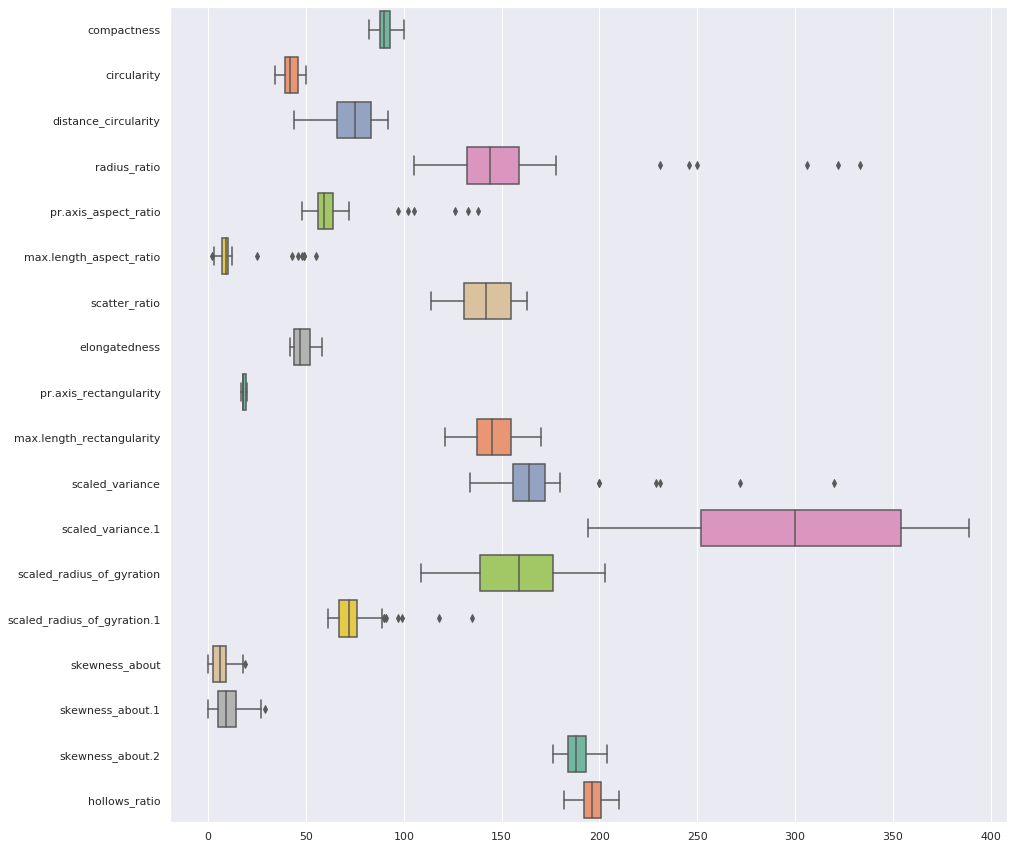

In [0]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_van, orient="h", palette="Set2")

radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 have outliers

Checking the outliers in radius_ratio

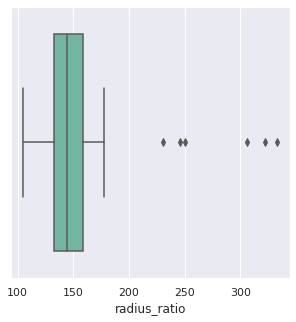

In [0]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.boxplot(x=df_van['radius_ratio'], orient="h", palette="Set2")

In [0]:
df_van[df_van['radius_ratio']>175]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
37,90.0,48.0,86.0,306.0,126.0,49.0,153.0,44.0,19.0,156.0,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194.0,van
135,89.0,47.0,83.0,322.0,133.0,48.0,158.0,43.0,20.0,163.0,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194.0,van
291,89.0,45.0,81.0,246.0,102.0,43.0,155.0,44.0,20.0,160.0,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192.0,van
388,94.0,47.0,85.0,333.0,138.0,49.0,155.0,43.0,19.0,155.0,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196.0,van
523,90.0,43.0,81.0,231.0,97.0,46.0,150.0,45.0,19.0,149.0,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196.0,van
535,98.0,44.0,88.0,176.0,67.0,10.0,158.0,43.0,20.0,149.0,173.0,367.0,154.0,66.0,14.0,9.0,194.0,202.0,van
706,82.0,43.0,70.0,250.0,105.0,55.0,139.0,48.0,18.0,145.0,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199.0,van


Dropping only those rows where radius_ratio is too large(>300)

In [0]:
df_van.drop(df_van[df_van['radius_ratio']>300].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking the outliers in pr.axis_aspect_ratio

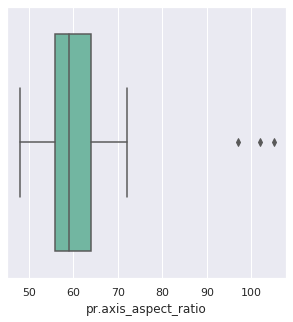

In [0]:
ax = sns.boxplot(x=df_van['pr.axis_aspect_ratio'], orient="h", palette="Set2")

In [0]:
df_van[df_van['pr.axis_aspect_ratio']>72]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
291,89.0,45.0,81.0,246.0,102.0,43.0,155.0,44.0,20.0,160.0,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192.0,van
523,90.0,43.0,81.0,231.0,97.0,46.0,150.0,45.0,19.0,149.0,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196.0,van
706,82.0,43.0,70.0,250.0,105.0,55.0,139.0,48.0,18.0,145.0,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199.0,van


Dropping the three rows since they are too large

In [0]:
df_van.drop(df_van[df_van['pr.axis_aspect_ratio']>72].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in max.length_aspect_ratio

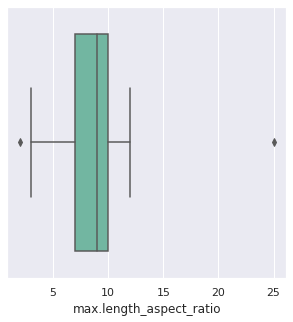

In [0]:
ax = sns.boxplot(x=df_van['max.length_aspect_ratio'], orient="h", palette="Set2")

In [0]:
df_van[df_van['max.length_aspect_ratio']>14]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
391,91.0,38.0,70.0,160.0,66.0,25.0,140.0,47.0,18.0,139.0,162.0,296.0,130.0,67.0,4.0,11.0,192.0,202.0,van


Dropping this record since this is too large compared to others

In [0]:
df_van.drop(df_van[df_van['max.length_aspect_ratio']>14].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in scaled_variance

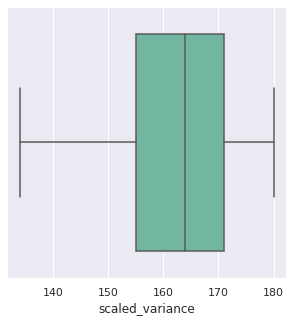

In [0]:
ax = sns.boxplot(x=df_van['scaled_variance'], orient="h", palette="Set2")

No outliers needed to be treated

Checking for outliers in scaled_radius_of_gyration.1

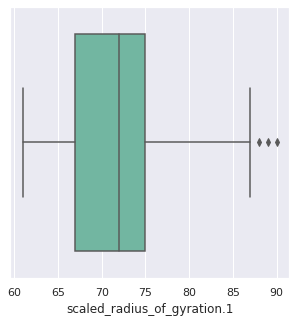

In [0]:
ax = sns.boxplot(x=df_van['scaled_radius_of_gyration.1'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in skewness_about

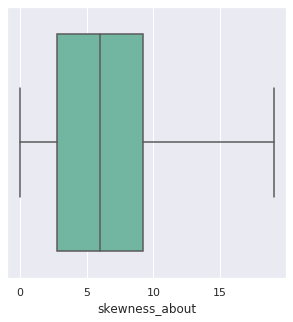

In [0]:
ax = sns.boxplot(x=df_van['skewness_about'], orient="h", palette="Set2")

No outliers needed to be treated

Checking for outliers in skewness_about.1

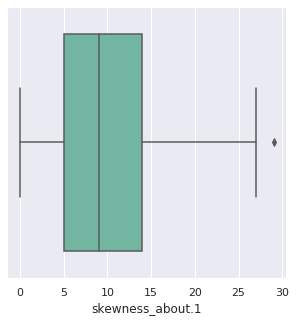

In [0]:
ax = sns.boxplot(x=df_van['skewness_about.1'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

# Missing value and outlier treatment for bus

In [0]:
df_bus.isnull().sum()

compactness                    0
circularity                    4
distance_circularity           3
radius_ratio                   2
pr.axis_aspect_ratio           1
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         1
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    1
skewness_about                 4
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
MICE_imputer = IterativeImputer()
X = df_bus.drop('class', axis = 1)
X.iloc[:,:] = MICE_imputer.fit_transform(X) 

In [0]:
df_bus.iloc[:,:-1] = X

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


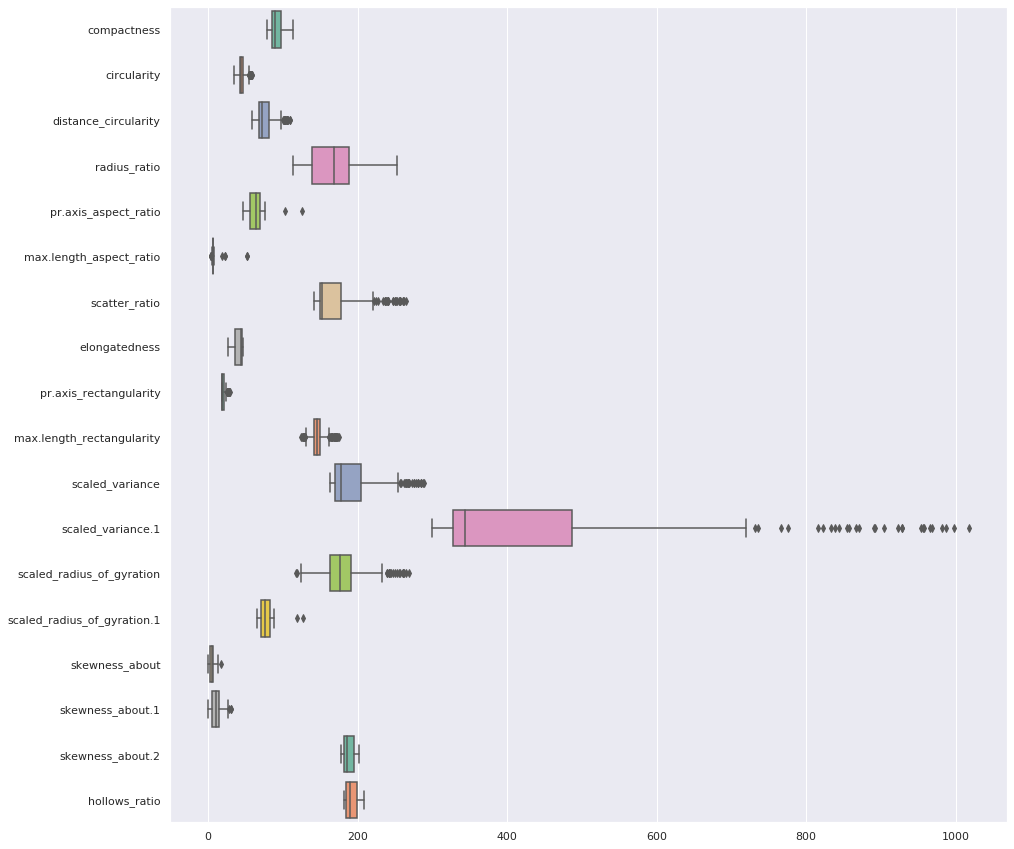

In [0]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.boxplot(data=df_bus, orient="h", palette="Set2")

circularity, distance_circularity, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 have to be treated for outliers

Checking for outliers in circularity

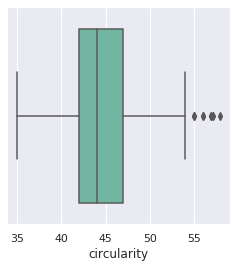

In [0]:
sns.set(rc={'figure.figsize':(4,4)})
ax = sns.boxplot(x=df_bus['circularity'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in distance_circularity

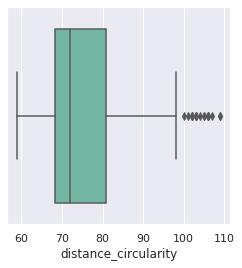

In [0]:
ax = sns.boxplot(x=df_bus['distance_circularity'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in pr.axis_aspect_ratio

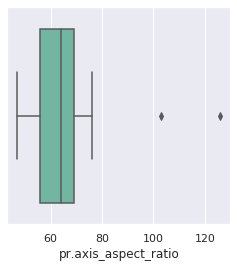

In [0]:
ax = sns.boxplot(x=df_bus['pr.axis_aspect_ratio'], orient="h", palette="Set2")

In [0]:
df_bus[df_bus['pr.axis_aspect_ratio']>78]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
100,82.0,45.0,66.0,252.0,126.0,52.0,148.0,45.0,19.0,144.0,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185.0,bus


Dropping these records since they are too large compared to others

In [0]:
df_bus.drop(df_bus[df_bus['pr.axis_aspect_ratio']>78].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in max.length_aspect_ratio

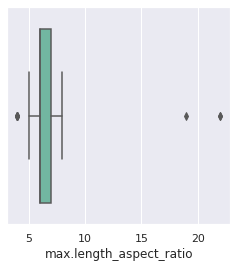

In [0]:
ax = sns.boxplot(x=df_bus['max.length_aspect_ratio'], orient="h", palette="Set2")

In [0]:
df_bus[df_bus['max.length_aspect_ratio']>8]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
127,85.0,41.0,66.0,155.0,65.0,22.0,149.0,45.0,19.0,139.0,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191.0,bus
544,88.0,43.0,70.0,177.0,74.0,19.0,152.0,44.0,19.0,143.0,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189.0,bus
815,81.0,45.0,68.0,154.0,69.0,22.0,151.0,45.0,19.0,147.0,186.0,335.0,186.0,88.0,1.0,10.0,180.0,185.0,bus


Dropping these records since they are too large compared to others

In [0]:
df_bus.drop(df_bus[df_bus['max.length_aspect_ratio']>8].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in scatter_ratio


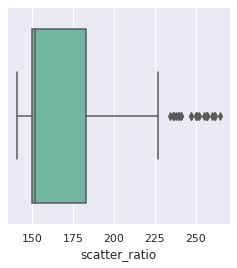

In [0]:
ax = sns.boxplot(x=df_bus['scatter_ratio'], orient="h", palette="Set2")

In [0]:
df_bus[df_bus['scatter_ratio']>250]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
5,107.0,57.168701,106.0,172.0,50.0,6.0,255.0,26.0,28.0,169.0,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183.0,bus
54,101.0,56.000000,104.0,185.0,53.0,6.0,257.0,26.0,28.0,168.0,275.0,956.0,230.0,83.0,5.0,26.0,180.0,184.0,bus
85,110.0,58.000000,106.0,180.0,51.0,6.0,261.0,26.0,28.0,171.0,278.0,998.0,257.0,83.0,9.0,13.0,181.0,182.0,bus
274,107.0,57.000000,106.0,179.0,51.0,8.0,257.0,26.0,28.0,172.0,275.0,954.0,232.0,83.0,2.0,20.0,181.0,184.0,bus
321,113.0,57.000000,109.0,194.0,56.0,6.0,260.0,26.0,28.0,175.0,288.0,982.0,261.0,85.0,11.0,21.0,182.0,183.0,bus
396,108.0,57.227104,106.0,177.0,51.0,5.0,256.0,26.0,28.0,170.0,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181.0,bus
531,107.0,55.000000,103.0,167.0,49.0,7.0,252.0,27.0,28.0,172.0,269.0,904.0,239.0,83.0,5.0,30.0,179.0,186.0,bus
683,110.0,56.000000,109.0,199.0,57.0,5.0,251.0,27.0,27.0,169.0,272.0,928.0,268.0,82.0,11.0,10.0,183.0,183.0,bus
687,106.0,57.000000,107.0,235.0,67.0,6.0,262.0,26.0,28.0,171.0,285.0,987.0,260.0,86.0,9.0,31.0,180.0,184.0,bus
733,114.0,57.000000,102.0,181.0,52.0,6.0,257.0,26.0,28.0,169.0,287.0,968.0,261.0,85.0,2.0,21.0,182.0,184.0,bus


Dropping these records since they are too large compared to others

In [0]:
df_bus.drop(df_bus[df_bus['scatter_ratio']>250].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in pr.axis_rectangularity

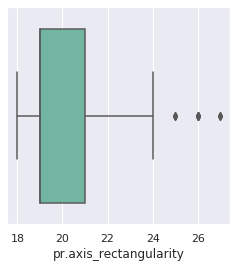

In [0]:
ax = sns.boxplot(x=df_bus['pr.axis_rectangularity'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in scaled_variance

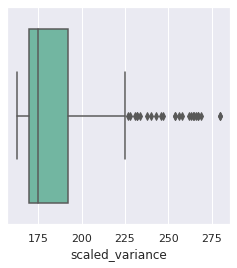

In [0]:
ax = sns.boxplot(x=df_bus['scaled_variance'], orient="h", palette="Set2")

In [0]:
df_bus[df_bus['scaled_variance']>250]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
155,110.0,56.0,103.0,223.000000,64.0,5.0,250.0,26.0,27.0,169.0,280.0,928.0,239.0,85.0,4.0,6.0,184.0,183.0,bus
171,106.0,54.0,103.0,161.000000,47.0,4.0,247.0,27.0,27.0,166.0,266.0,892.0,242.0,85.0,4.0,11.0,181.0,183.0,bus
193,107.0,55.0,98.0,199.000000,59.0,7.0,240.0,27.0,26.0,168.0,258.0,866.0,245.0,80.0,3.0,1.0,186.0,184.0,bus
294,109.0,55.0,102.0,169.000000,51.0,6.0,241.0,27.0,26.0,165.0,265.0,870.0,247.0,84.0,10.0,11.0,184.0,183.0,bus
345,101.0,54.0,106.0,190.464421,57.0,7.0,236.0,28.0,26.0,164.0,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185.0,bus
375,109.0,52.0,95.0,189.000000,58.0,4.0,227.0,29.0,25.0,158.0,262.0,776.0,217.0,82.0,0.0,19.0,187.0,186.0,bus
381,106.0,54.0,100.0,227.000000,67.0,4.0,250.0,27.0,27.0,162.0,280.0,923.0,262.0,88.0,5.0,11.0,182.0,182.0,bus
444,102.0,53.0,101.0,238.000000,72.0,4.0,238.0,28.0,26.0,163.0,267.0,844.0,242.0,85.0,7.0,22.0,184.0,184.0,bus
472,105.0,50.0,93.0,173.000000,54.0,4.0,222.0,30.0,25.0,159.0,254.0,735.0,206.0,83.0,4.0,12.0,186.0,184.0,bus
494,106.0,54.0,105.0,164.000000,48.0,5.0,247.0,27.0,27.0,165.0,269.0,891.0,243.0,84.0,12.0,1.0,181.0,182.0,bus


Dropping these records since they are too large compared to others

In [0]:
df_bus.drop(df_bus[df_bus['scaled_variance']>250].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in scaled_variance.1

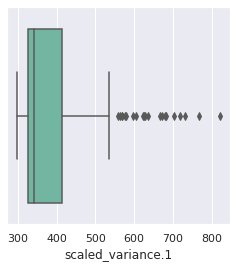

In [0]:
ax = sns.boxplot(x=df_bus['scaled_variance.1'], orient="h", palette="Set2")

In [0]:
df_bus[df_bus['scaled_variance.1']>580]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
78,104.0,52.0,94.000000,205.542433,66.0,5.0,208.0,31.0,24.0,161.0,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191.0,bus
81,99.0,51.0,92.000000,203.000000,65.0,5.0,209.0,31.0,24.0,159.0,232.0,671.0,214.0,78.0,5.0,11.0,191.0,189.0,bus
129,100.0,48.0,95.000000,209.000000,68.0,7.0,199.0,32.0,23.0,150.0,216.0,605.0,200.0,73.0,7.0,11.0,192.0,194.0,bus
173,96.0,49.0,98.000000,187.000000,59.0,6.0,213.0,31.0,24.0,152.0,228.0,680.0,210.0,77.0,8.0,28.0,188.0,189.0,bus
213,104.0,49.0,89.000000,168.000000,54.0,4.0,212.0,31.0,24.0,153.0,238.0,682.0,198.0,78.0,1.0,23.0,190.0,189.0,bus
319,102.0,51.0,94.251252,194.000000,60.0,6.0,220.0,30.0,25.0,162.0,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186.0,bus
334,107.0,57.0,102.000000,184.000000,55.0,7.0,234.0,28.0,26.0,171.0,243.0,822.0,229.0,77.0,7.0,11.0,187.0,187.0,bus
337,99.0,51.0,88.000000,188.000000,62.0,5.0,203.0,32.0,23.0,158.0,222.0,625.0,219.0,77.0,8.0,26.0,191.0,190.0,bus
431,99.0,47.0,91.000000,226.000000,74.0,5.0,202.0,32.0,23.0,148.0,234.0,629.0,186.0,79.0,4.0,11.0,192.0,191.0,bus
448,101.0,53.0,91.000000,194.000000,65.0,6.0,204.0,32.0,23.0,161.0,231.0,636.0,214.0,78.0,5.0,14.0,192.0,192.0,bus


Dropping these records since they are too large compared to others

In [0]:
df_bus.drop(df_bus[df_bus['scaled_variance.1']>580].index, axis=0, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking for outliers in scaled_radius_of_gyration

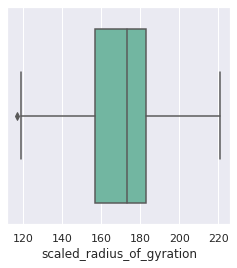

In [0]:
ax = sns.boxplot(x=df_bus['scaled_radius_of_gyration'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in scaled_radius_of_gyration.1

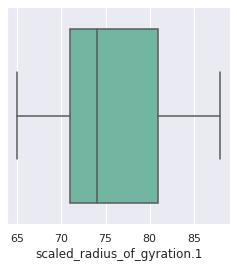

In [0]:
ax = sns.boxplot(x=df_bus['scaled_radius_of_gyration.1'], orient="h", palette="Set2")

No outliers needed to be treated

Checking for outliers in skewness_about

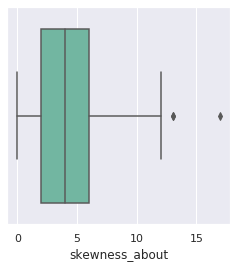

In [0]:
ax = sns.boxplot(x=df_bus['skewness_about'], orient="h", palette="Set2")

Not treating for outliers since the values doesn't appear to be an anamoly

Checking for outliers in skewness_about.1

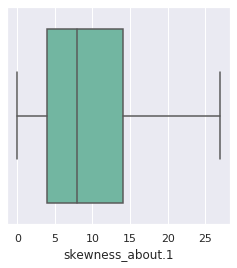

In [0]:
ax = sns.boxplot(x=df_bus['skewness_about.1'], orient="h", palette="Set2")

No outliers needed to be treated

# Finding relationship between attributes

In [0]:
final = [df_cars, df_van, df_bus]
df_final = pd.concat(final)

In [0]:
df_final.shape

(794, 19)

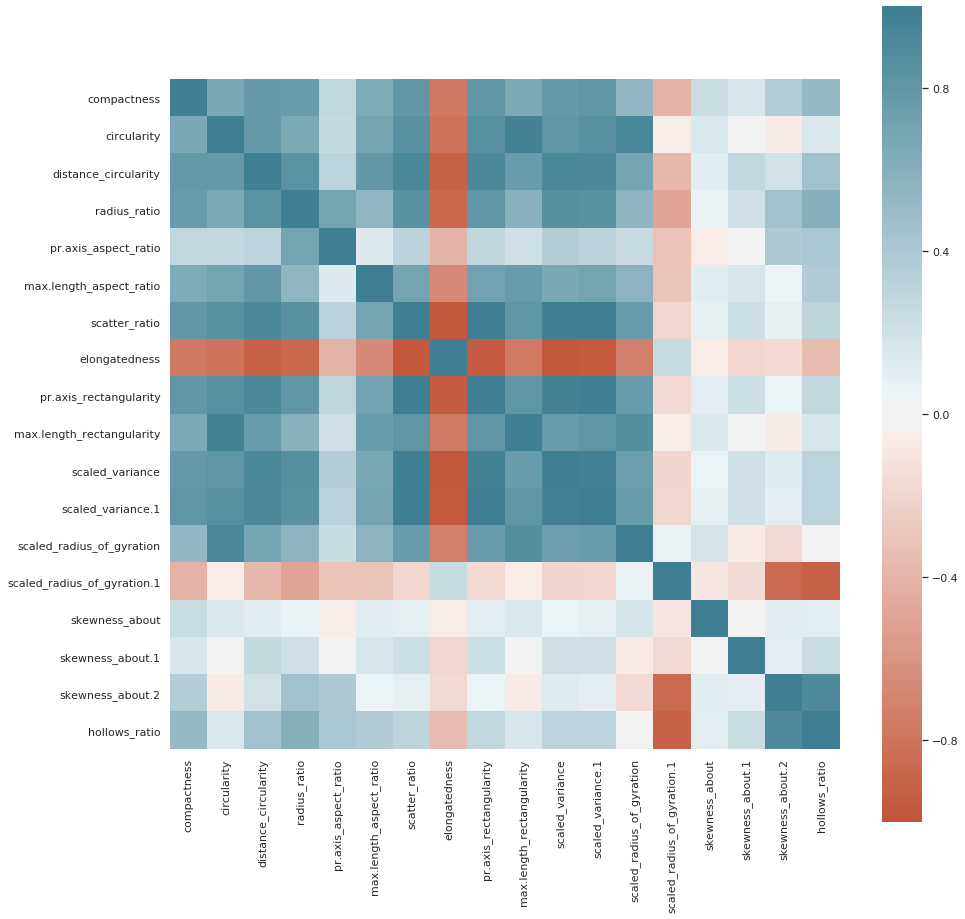

In [0]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df_final.drop('class', axis=1).corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

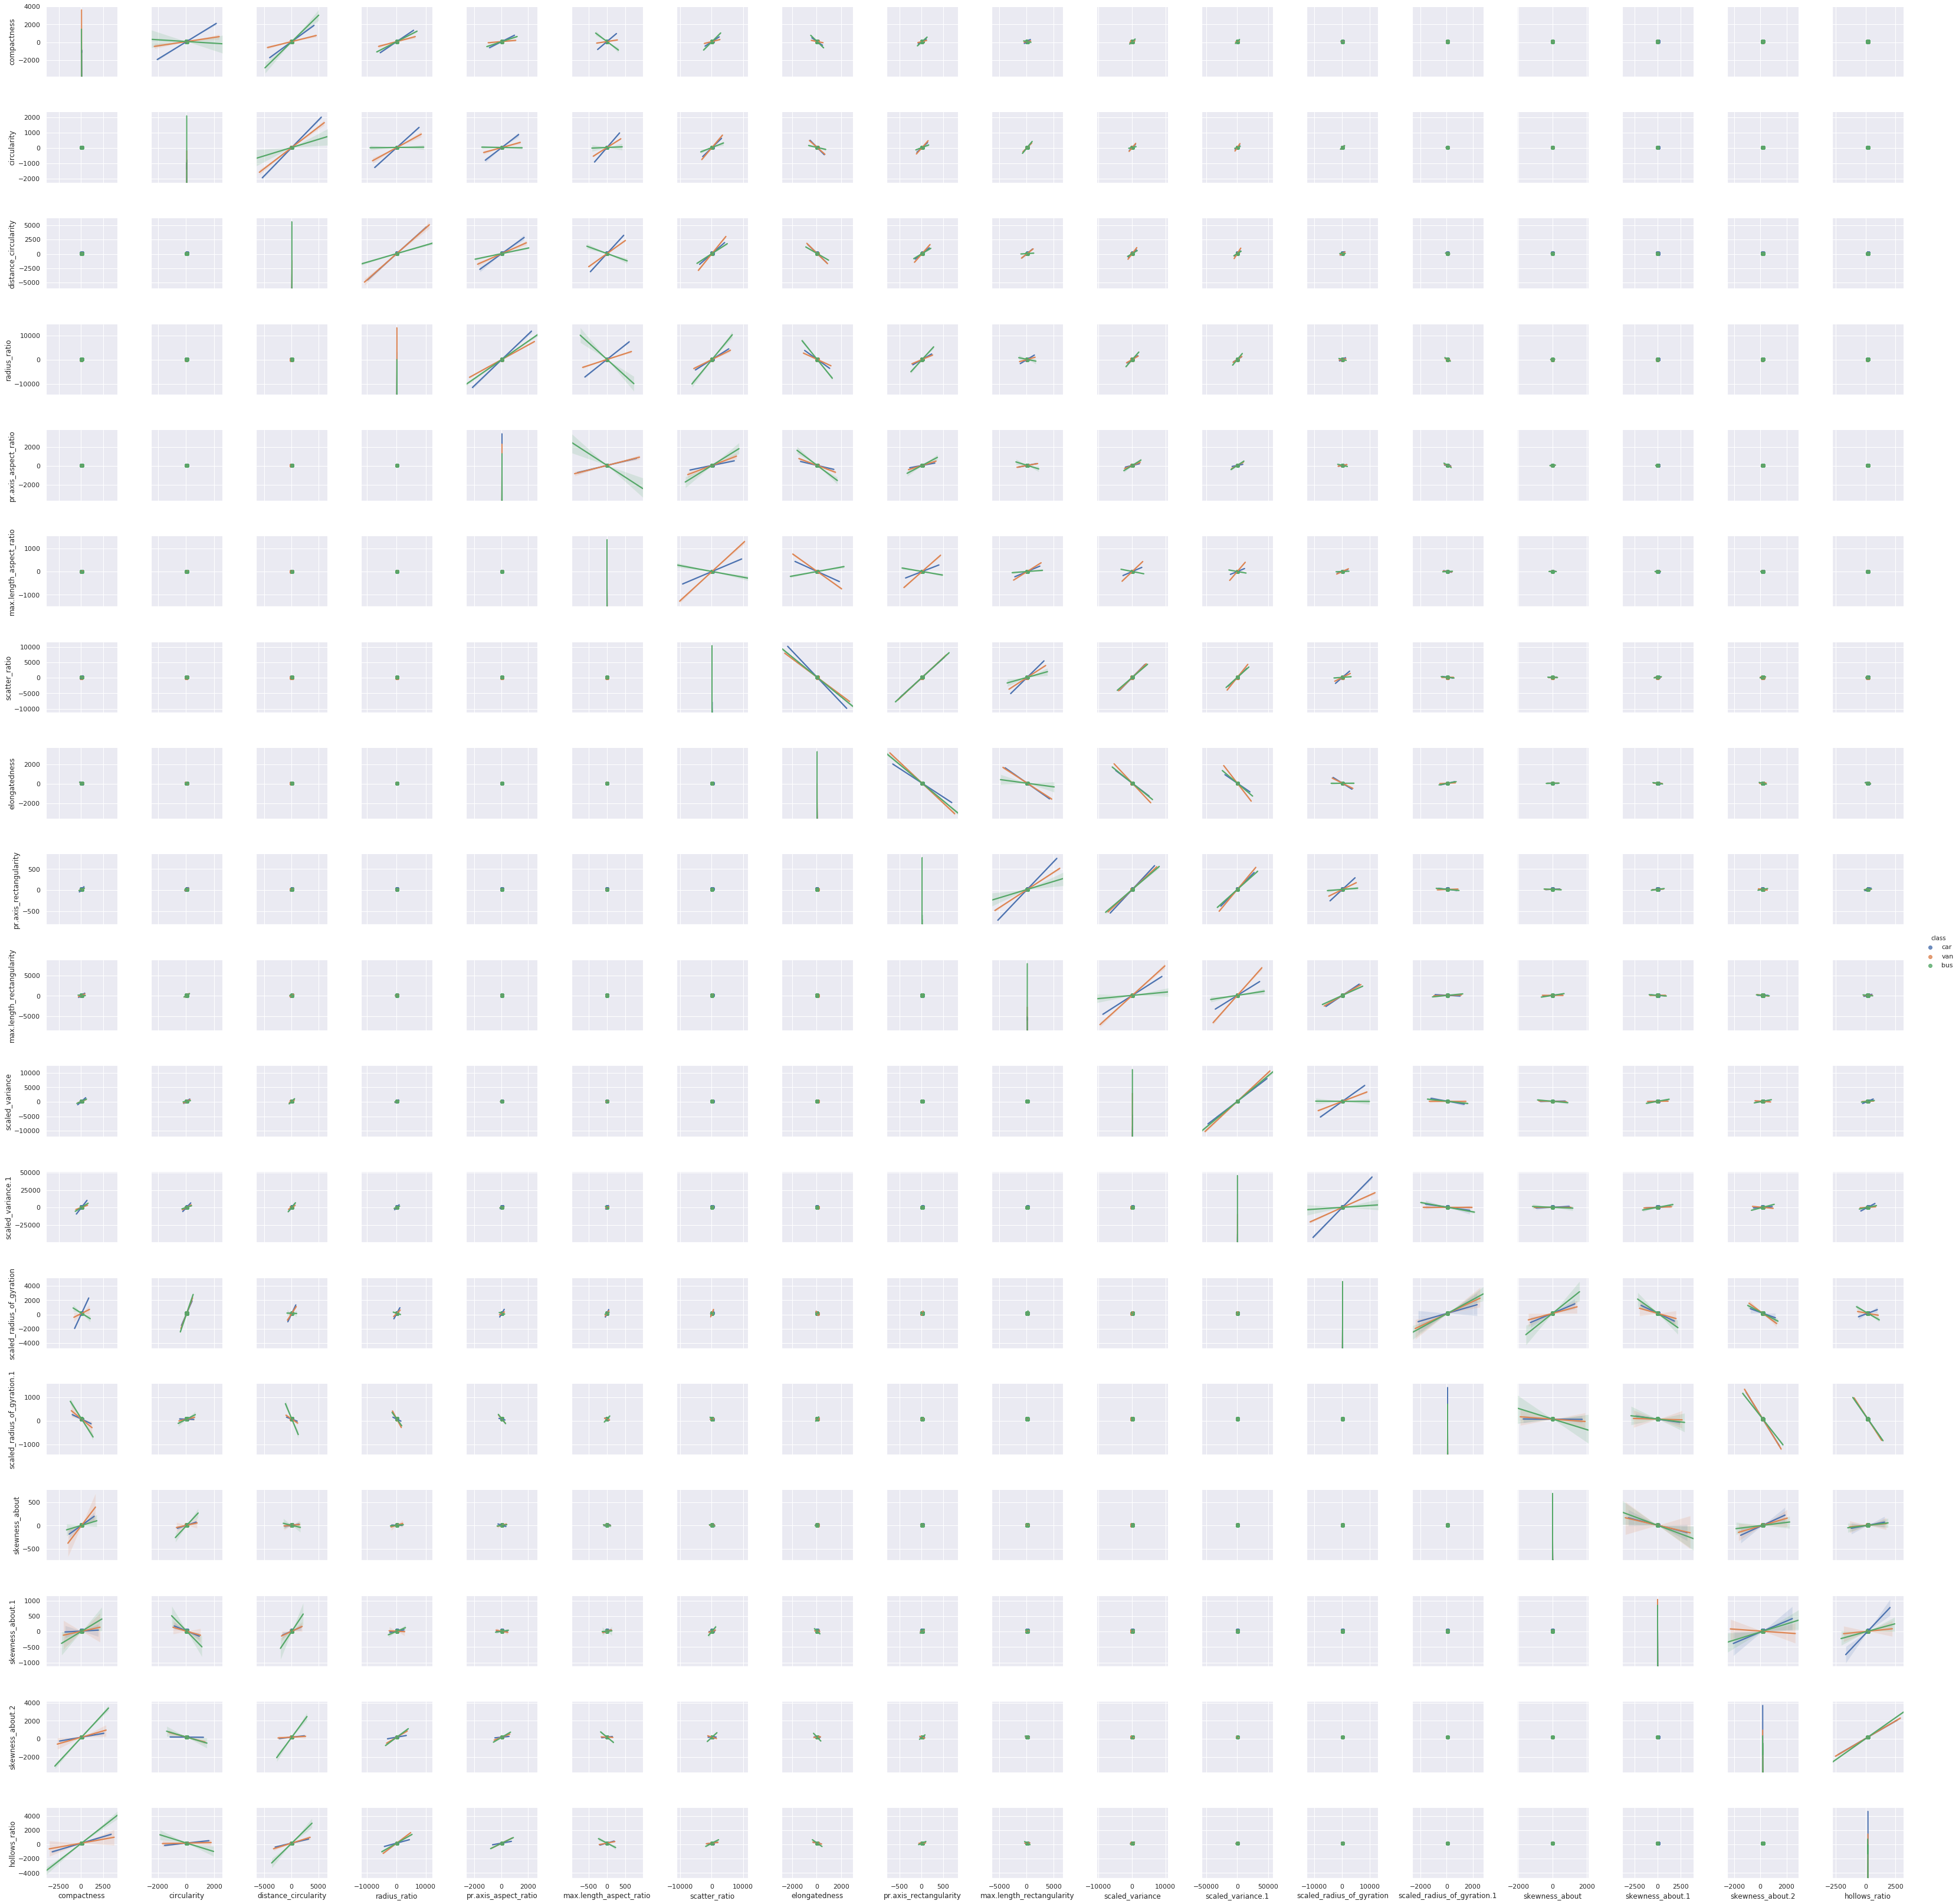

In [0]:
g = sns.pairplot(df_final, hue="class", kind = 'reg')

<ul>
<li>The strongest linear correlators with <strong>Compactness</strong> are - Circularity, Distance circularity<br></li>
<li>The strongest linear correlators with <strong>Circularity</strong> are - Distance circularity, radius ratio<br></li>
<li>The strongest linear correlators with <strong>Distance circularity</strong> are - radius ratio, pr.axis_aspect_ratio<br></li>
<li>The strongest linear correlators with <strong>radius ratio</strong> are - pr.axis_aspect_ratio, max.length_aspect_ratio, scatter ratio<br></li>
<li>The strongest linear correlators with <strong>pr.axis_aspect_ratio</strong> are - max.length_aspect_ratio, scatter ratio, elongatedness<br></li>
<li>The strongest linear correlators with <strong>max.length_aspect_ratio</strong> are - scatter ratio, elongatedness, pr.axis_rectangularity<br></li>
<li>The strongest linear correlators with <strong>scatter ratio</strong> are - elongatedness, pr.axis_rectangularity<br></li>
<li>The strongest linear correlators with <strong>elongatedness</strong> are -  pr.axis_rectangularity<br></li>
<li>The strongest linear correlators with <strong>pr.axis_rectangularity</strong> are -  max.length_rectangularity, scaled_variance<br></li>
<li>The strongest linear correlators with <strong>max.length_rectangularity</strong> are -  scaled_variance, scaled_variance.1<br></li>
<li>The strongest linear correlators with <strong>scaled_variance</strong> are -  scaled_variance<br></li>
<li>The strongest linear correlators with <strong>scaled_variance.1</strong> are -  scaled_radius_of_gyration<br></li>
<li>The strongest linear correlators with <strong>scaled_radius_of_gyration</strong> are -  circularity, scaled_radius_of_gyration.1<br></li>
<li>The strongest linear correlators with <strong>scaled_radius_of_gyration.1</strong> are -  compactness, skewness_about.2, hollows_ratio<br></li>
<li>The strongest linear correlators with <strong>skewness_about</strong> are -  compactness<br></li>
<li>The strongest linear correlators with <strong>skewness_about.1</strong> are -  hollows_ratio, distance_circularity<br></li>
<li>The strongest linear correlators with <strong>skewness_about.2</strong> are -  compactness, distance_circularity, hollows_ratio<br></li>
<li>The strongest linear correlators with <strong>hollows_ratio</strong> are -  compactness, distance_circularity<br></li>
</ul>

# PCA

In [0]:
labelencoder = LabelEncoder()
df_final.iloc[:,-1] = labelencoder.fit_transform(df_final.iloc[:,-1])

In [0]:
X = df_final.drop('class', axis = 1)
y = df_final['class']

In [0]:
sc = StandardScaler()
X_train_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00126103  0.66420043  0.78053695  0.76415729  0.2824242   0.64257988
   0.7956763  -0.76673263  0.79845277  0.65618764  0.77931367  0.80765462
   0.53658793 -0.41174146  0.24947262  0.15982144  0.36744529  0.51146993]
 [ 0.66420043  1.00126103  0.78684604  0.65494311  0.28015436  0.70202577
   0.84993981 -0.81115847  0.84973006  0.96807758  0.81124068  0.84705456
   0.93543593 -0.05492283  0.15635777 -0.02764853 -0.06679374  0.15573989]
 [ 0.78053695  0.78684604  1.00126103  0.82918749  0.31998763  0.79137574
   0.92241693 -0.913536    0.91319532  0.76333558  0.91685423  0.91434903
   0.68846489 -0.37631516  0.11669166  0.27011943  0.19487045  0.44722512]
 [ 0.76415729  0.65494311  0.82918749  1.00126103  0.69993842  0.55276856
   0.83735266 -0.8722999   0.81350288  0.58782622  0.86127578  0.83993122
   0.56459555 -0.50561699  0.06321575  0.19673128  0.45721902  0.59593138]
 [ 0.2824242   0.28015436  0.31998763  0.69993842  1.00126103  0.13930867
   0.3231587

In [0]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.63060393e-01  9.46787790e-02 -7.86839528e-02 -1.63142813e-01
   1.57251531e-02 -3.23407744e-01 -1.80550004e-01  7.62747147e-01
  -3.52865685e-01  1.15252908e-01 -4.25580734e-02  9.85401372e-03
  -1.72838322e-01 -1.57820869e-03  1.29041897e-02 -4.56966311e-03
  -6.14726975e-03  7.57374989e-04]
 [-2.72714080e-01 -1.90494716e-01 -1.88886138e-01  3.81624406e-02
  -9.91321918e-02  1.96977894e-01  3.17239038e-01  1.03226570e-01
  -1.78240415e-02 -2.22519133e-01 -6.52804212e-02  3.47716475e-02
   2.91876285e-02 -1.59067719e-02 -1.88131571e-01 -2.43951266e-01
  -6.04256146e-01  4.19334510e-01]
 [-2.94863975e-01  1.25503624e-02  9.09567366e-02 -9.34665433e-02
  -5.79989033e-02  1.87642916e-02 -1.49701452e-01 -2.97305409e-01
  -2.83169468e-01  5.26099540e-02 -7.62988056e-01 -2.85919113e-01
   1.01618026e-01  8.81940164e-03  1.33696309e-01  3.96445270e-02
  -4.95840722e-02 -4.70037796e-02]
 [-2.76739127e-01  1.70268641e-01  3.75840149e-02  2.31444764e-01
   2.01762835e-01 -

In [0]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]
train_eig_pairs.sort(reverse = True)
train_eig_pairs

[(10.357967617476831,
  array([-2.63060393e-01,  9.46787790e-02, -7.86839528e-02, -1.63142813e-01,
          1.57251531e-02, -3.23407744e-01, -1.80550004e-01,  7.62747147e-01,
         -3.52865685e-01,  1.15252908e-01, -4.25580734e-02,  9.85401372e-03,
         -1.72838322e-01, -1.57820869e-03,  1.29041897e-02, -4.56966311e-03,
         -6.14726975e-03,  7.57374989e-04])),
 (3.110368290176745,
  array([-0.27271408, -0.19049472, -0.18888614,  0.03816244, -0.09913219,
          0.19697789,  0.31723904,  0.10322657, -0.01782404, -0.22251913,
         -0.06528042,  0.03477165,  0.02918763, -0.01590677, -0.18813157,
         -0.24395127, -0.60425615,  0.41933451])),
 (1.2030652496767105,
  array([-0.29486397,  0.01255036,  0.09095674, -0.09346654, -0.0579989 ,
          0.01876429, -0.14970145, -0.29730541, -0.28316947,  0.05260995,
         -0.76298806, -0.28591911,  0.10161803,  0.0088194 ,  0.13369631,
          0.03964453, -0.04958407, -0.04700378])),
 (1.1530560288549316,
  array([-0.2

In [0]:
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

In [0]:
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[10.357967617476831, 3.110368290176745, 1.2030652496767105, 1.1530560288549316, 0.7651645918083705, 0.5020422966923813, 0.3111757835387364, 0.23857072718118905, 0.11936547126868381, 0.08178603299350914, 0.06080181130868033, 0.04289822281020115, 0.025308147554432104, 0.018468428001684568, 0.014007574825966434, 0.0112072274120473, 0.0070457524318925735, 0.0003993588495510101]


In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in train_eigvalues_sorted] 
cum_var_exp = np.cumsum(var_explained) 

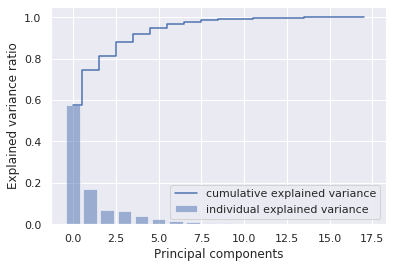

In [0]:
plt.bar(range(0,18), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

considering 6 dimensions since they represent 95% variance

In [0]:
P_reduce = np.array(train_eigvectors_sorted[0:6])
X_std_4D = np.dot(X_train_std,P_reduce.T) 
final_data_df = pd.DataFrame(X_std_4D)

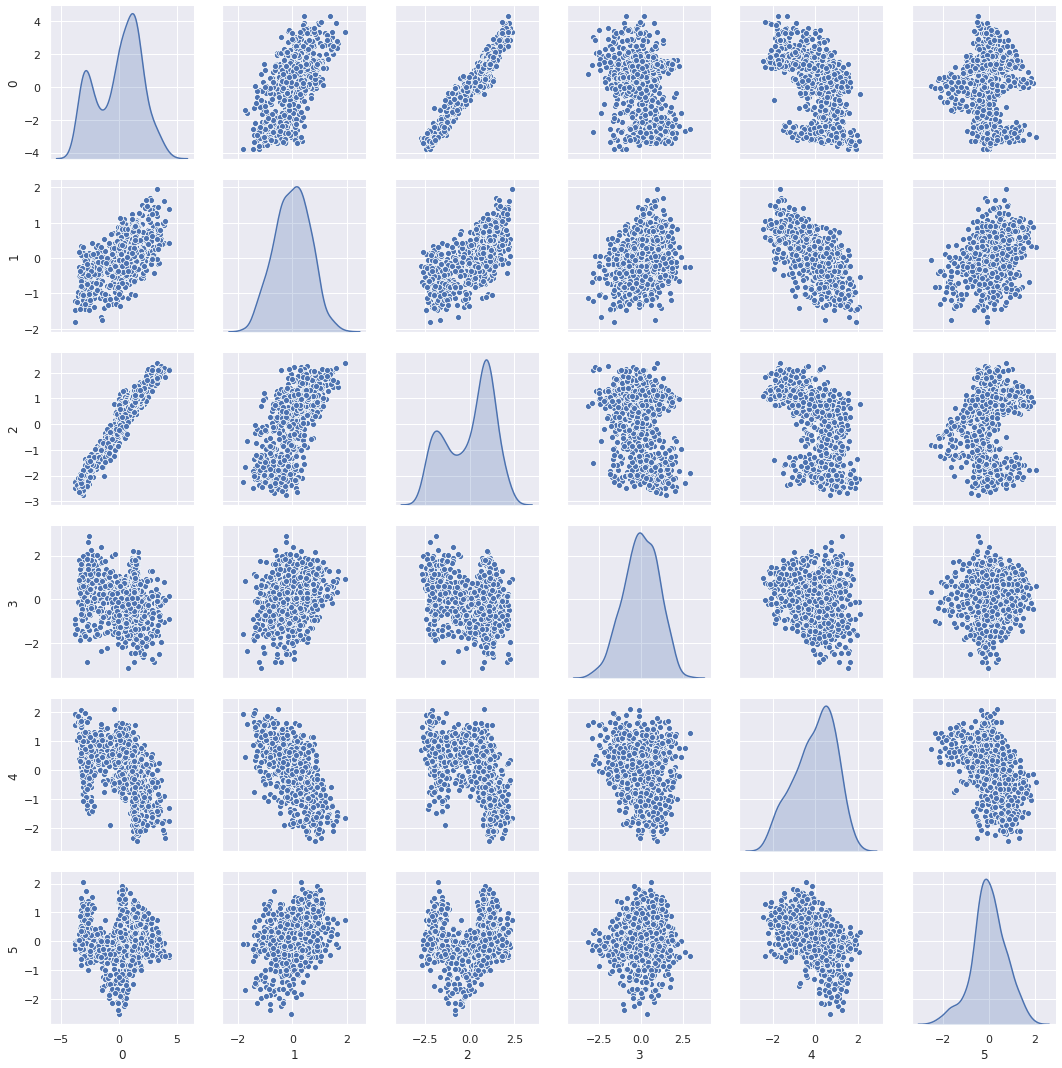

In [0]:
sns.pairplot(final_data_df, diag_kind='kde')

# SVM

kernel = Linear

In [0]:
gsc = GridSearchCV(
        estimator=SVC(kernel='linear'),
        param_grid={
            'C': [0.01, 0.05, 0.1, 0.5],
        },
        cv=5, verbose=0, n_jobs=-1)


In [0]:
grid_result = gsc.fit(final_data_df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
grid_result.best_params_

{'C': 0.5}

running cross validation for 5 runs

In [0]:
clf_lin = SVC(kernel='linear', C=0.5)
scores = cross_val_score(clf_lin, final_data_df, y, cv=5)

In [0]:
scores

array([0.775     , 0.78125   , 0.79874214, 0.80379747, 0.85350318])

kernel = rbf

In [0]:
gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.01, 0.05, 0.1, 0.5],
        },
        cv=5, verbose=0, n_jobs=-1)

In [0]:
grid_result = gsc.fit(final_data_df, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
grid_result.best_params_

{'C': 0.5}

running cross validation for 5 runs

In [0]:
clf_rbf = SVC(kernel='rbf', C=0.5)
scores = cross_val_score(clf_rbf, final_data_df, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [0]:
scores

array([0.8875    , 0.89375   , 0.93710692, 0.87974684, 0.91719745])

In [0]:
scores.mean()

0.9030602411822661

RBF kernel gives the best accuracy mean of 90% for C=0.5